In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [5]:
df.head()

,beta,exponential,normal_p,normal_l
0,59.668106,21.323039,10.057475,5.375822
1,27.927351,15.764923,9.119676,20.310735
2,37.178234,14.434328,13.402043,25.751363
3,53.320607,9.340248,10.772147,6.309222
4,57.741020,3.868236,11.310408,18.213342


<AxesSubplot:ylabel='Density'>

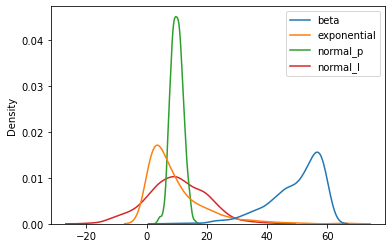

In [7]:
sns.kdeplot(data=df)

In [12]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [13]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,59.668106,21.323039,10.057475,5.375822,20.465907
1,27.927351,15.764923,9.119676,20.310735,19.468175
2,37.178234,14.434328,13.402043,25.751363,21.850592
3,53.320607,9.340248,10.772147,6.309222,21.708146
4,57.741020,3.868236,11.310408,18.213342,20.105312


<AxesSubplot:ylabel='Density'>

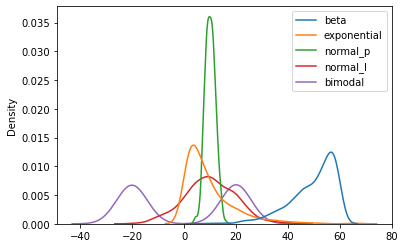

In [14]:
sns.kdeplot(data=df)

In [15]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.732793,9.562501,10.034977,9.961739,-0.086424
std,8.866138,9.663986,2.015054,9.799301,20.289446
min,7.303264,0.015971,3.613918,-19.398275,-27.905494
25%,45.062180,2.923145,8.615589,3.725114,-20.203388
50%,52.268529,6.577678,9.991031,9.796327,-0.416663
75%,56.753034,12.880546,11.401209,16.862123,20.001923
max,59.992798,66.880806,16.305681,42.010968,27.966661


<AxesSubplot:ylabel='Density'>

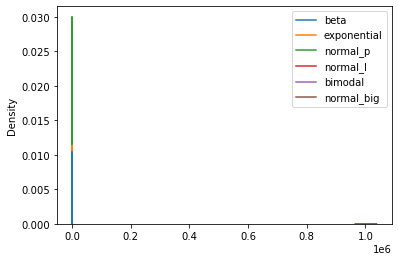

In [16]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

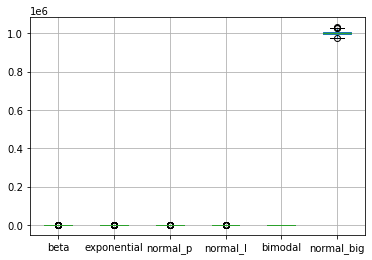

In [17]:
df.boxplot()

In [18]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [22]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)
# lấy danh sáchc cột
col_names = list(df.columns)
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,1.121151,1.217554,0.011170,-0.468218,1.013464,0.017736
1,-2.460637,0.642129,-0.454459,1.056624,0.964264,-0.254367
2,-1.416721,0.504374,1.671792,1.612107,1.081744,0.360933
3,0.404867,-0.023009,0.366014,-0.372919,1.074720,-0.437855
4,0.903689,-0.589520,0.633268,0.842482,0.995682,0.082976


<AxesSubplot:ylabel='Density'>

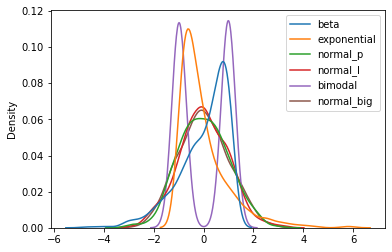

In [23]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [24]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.395861e-16,-2.986500e-17,3.588241e-16,1.065814e-17,2.565725e-16,-5.314194e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.787965e+00,-9.883402e-01,-3.188139e+00,-2.997633e+00,-1.371796e+00,-2.792371e+00
25%,-5.270558e-01,-6.873641e-01,-7.047448e-01,-6.367541e-01,-9.919951e-01,-6.632981e-01
50%,2.861454e-01,-3.090150e-01,-2.181988e-02,-1.688847e-02,-1.628456e-02,-4.047206e-02
75%,7.921998e-01,3.435131e-01,6.783516e-01,7.045233e-01,9.905839e-01,6.671065e-01
max,1.157791e+00,5.934092e+00,3.113485e+00,3.272199e+00,1.383336e+00,3.050389e+00


<AxesSubplot:>

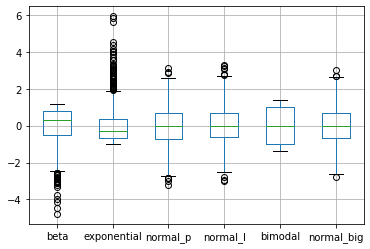

In [25]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()